In [122]:
import pandas as pd
import matplotlib.pyplot as plt

In [123]:
rc_wood = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
print(rc_wood.head())

   Rank          Name                       Park             Location  \
0     1  Boulder Dash             Lake Compounce       Bristol, Conn.   
1     2       El Toro  Six Flags Great Adventure        Jackson, N.J.   
2     3       Phoenix  Knoebels Amusement Resort        Elysburg, Pa.   
3     4    The Voyage              Holiday World    Santa Claus, Ind.   
4     5   Thunderhead                  Dollywood  Pigeon Forge, Tenn.   

           Supplier  Year Built  Points  Year of Rank  
0               CCI        2000    1333          2013  
1           Intamin        2006    1302          2013  
2  Dinn/PTC-Schmeck        1985    1088          2013  
3     Gravity Group        2006    1086          2013  
4              GCII        2004     923          2013  


In [124]:
rc_steel = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')
print(rc_steel.head())

   Rank                Name                        Park           Location  \
0     1    Millennium Force                 Cedar Point     Sandusky, Ohio   
1     2             Bizarro       Six Flags New England      Agawam, Mass.   
2     3  Expedition GeForce                Holiday Park  Hassloch, Germany   
3     4               Nitro   Six Flags Great Adventure      Jackson, N.J.   
4     5    Apollo’s Chariot  Busch Gardens Williamsburg  Williamsburg, Va.   

  Supplier  Year Built  Points  Year of Rank  
0  Intamin        2000    1204          2013  
1  Intamin        2000    1011          2013  
2  Intamin        2001     598          2013  
3      B&M        2001     596          2013  
4      B&M        1999     542          2013  


## Dataset Dictionary

**Rank**: rank of the roller coaster in a given year <br>
**Name**: name of the roller coaster<br>
**Park**: amusement park where the roller coaster is located<br>
**Location**: location of the amusement park where the roller coaster is located<br>
**Supplier**: manufacturer of the roller coaster<br>
**Year Built**: year the roller coaster was built<br>
**Points**: points scored in a given year’s ranking<br>
**Year of Rank**: year the roller coaster achieved a given rank<br>


In [125]:
def plot_rc_ranking(rc_name, park, rc_category):
    ax = plt.subplot()
    plt.plot(rc_category['Year of Rank'][(rc_category['Name'] == rc_name) & (rc_category['Park'] == park)], rc_category['Rank'][(rc_category['Name'] == rc_name) & (rc_category['Park'] == park)], marker='o')
    plt.xlabel('Year')
    plt.ylabel('Rank')
    ax.invert_yaxis()
    plt.show()

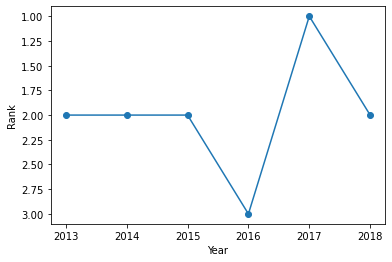

In [126]:
plot_rc_ranking('El Toro', 'Six Flags Great Adventure', rc_wood)

In [127]:
def plot_2rc_ranking(rc_names, park_list, rc_category):
    ax = plt.subplot()
    plt.plot(rc_category['Year of Rank'][(rc_category['Name'] == rc_names[0]) & (rc_category['Park'] == park_list[0])], rc_category['Rank'][(rc_category['Name'] == rc_names[0]) & (rc_category['Park'] == park_list[0])], marker='o', label=rc_names[0])
    plt.plot(rc_category['Year of Rank'][(rc_category['Name'] == rc_names[1]) & (rc_category['Park'] == park_list[1])], rc_category['Rank'][(rc_category['Name'] == rc_names[1]) & (rc_category['Park'] == park_list[1])], marker='o', label=rc_names[1])
    plt.xlabel('Year')
    plt.ylabel('Rank')
    ax.invert_yaxis()
    plt.legend()
    plt.show()

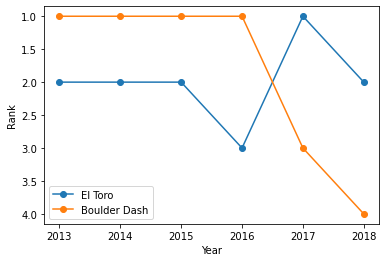

In [128]:
plot_2rc_ranking(['El Toro','Boulder Dash'], ['Six Flags Great Adventure','Lake Compounce'], rc_wood)

In [129]:
def top_ranking(n, rc_category):
    n_ranking = rc_category[rc_category['Rank'] <= n]
    plt.figure(figsize=(10,8))
    ax = plt.subplot()
    for rc in n_ranking['Name'].unique():
        ax.plot(n_ranking['Year of Rank'][n_ranking['Name'] == rc], n_ranking['Rank'][n_ranking['Name'] == rc], marker='o', label=rc)
    plt.xlabel('Year')
    plt.ylabel('Rank')
    ax.invert_yaxis()
    ax.set_yticks(range(1,6))
    plt.legend(loc=4)
    plt.show()

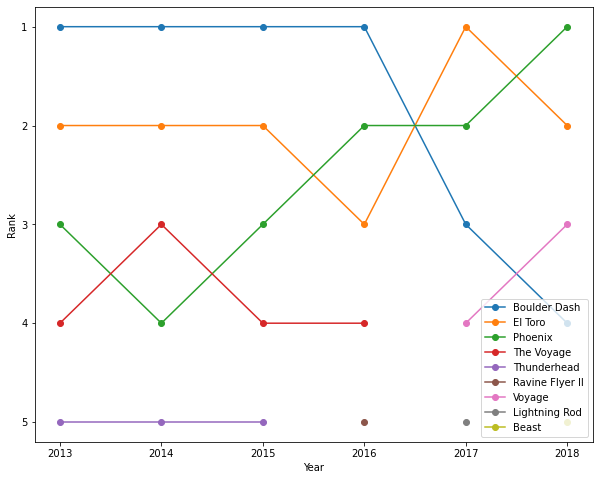

In [130]:
top_ranking(5, rc_wood)

In [131]:
roller_coasters = pd.read_csv('roller_coasters.csv')
print(roller_coasters.head())
# print(roller_coasters.info())

            name material_type seating_type  speed  height  length  \
0       Goudurix         Steel     Sit Down   75.0    37.0   950.0   
1  Dream catcher         Steel    Suspended   45.0    25.0   600.0   
2     Alucinakis         Steel     Sit Down   30.0     8.0   250.0   
3       Anaconda        Wooden     Sit Down   85.0    35.0  1200.0   
4         Azteka         Steel     Sit Down   55.0    17.0   500.0   

   num_inversions     manufacturer            park            status  
0             7.0           Vekoma    Parc Asterix  status.operating  
1             0.0           Vekoma   Bobbejaanland  status.operating  
2             0.0         Zamperla    Terra Mítica  status.operating  
3             0.0  William J. Cobb  Walygator Parc  status.operating  
4             0.0           Soquet          Le Pal  status.operating  


In [132]:
def rc_hist(dataframe, column):
    if column == 'height':
        plt.hist(dataframe['height'][dataframe['height'] <= 140])
    else:
        plt.hist(dataframe[column].dropna().values)
    plt.xlabel(column)
    plt.ylabel('Roller Coasters')
    plt.show()

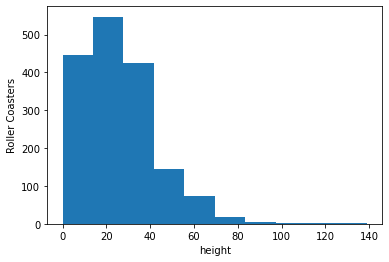

In [133]:
rc_hist(roller_coasters, 'height')

In [134]:
def rc_inversions(dataframe, park):
    park_coasters = dataframe[dataframe['park'] == park]
    park_coasters = park_coasters.sort_values('num_inversions', ascending=False)
    coasters = park_coasters['name']
    inversions = park_coasters['num_inversions']
    ax = plt.subplot()
    plt.bar(coasters, inversions)
    plt.xticks(rotation=90)
    plt.title('Number of Inversions Per Coaster at '+park)
    plt.xlabel('Roller Coasters')
    plt.ylabel('# of inversions')
    plt.show()

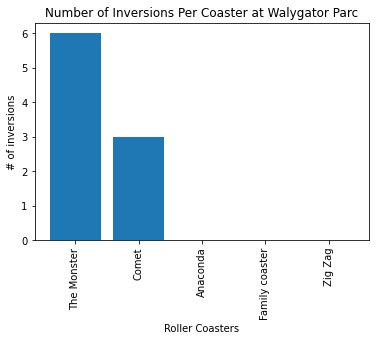

In [135]:
rc_inversions(roller_coasters, 'Walygator Parc')

In [136]:
def rc_status_pie(dataframe):
    operating = dataframe[dataframe['status'] == 'status.operating']
    closed = dataframe[dataframe['status'] == 'status.closed.definitely']
    status_counts = [len(operating), len(closed)]
    plt.pie(status_counts, labels=['Operating','Closed'], autopct='%d%%')
    plt.axis('equal')
    plt.title('Roller Coasters Status')
    plt.show()

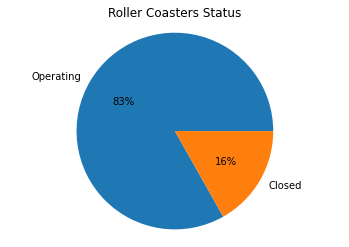

In [137]:
rc_status_pie(roller_coasters)

In [138]:
def rc_num_scatter(dataframe, numericals):
    x = dataframe[numericals[0]]
    y = dataframe[numericals[1]]
    plt.scatter(x,y)
    plt.title('Relationship Between ' + numericals[0].title() + ' and ' + numericals[1].title())
    plt.xlabel(numericals[0])
    plt.ylabel(numericals[1])
    plt.show()

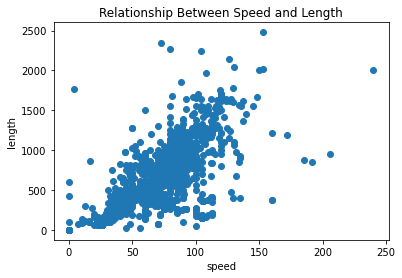

In [139]:
rc_num_scatter(roller_coasters, ['speed','length'])